# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2
# reloads modules automatically before entering 
# the execution of code typed at the IPython prompt.


# draw plots in the notebook
%matplotlib inline

In [2]:
# import libraries. 
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

We can create a variable PATH for where our project files such as csv file will be stored to make our work easier. The PATH will be different based on where your files are.

In [4]:
PATH = "/media/muoki/data/documents/code_training/portfolio/DataScienceProjects/fastai_Intro_ml/"

<h4>Loading the data.</h4>
<p>We will use a feather formart that we had earlier saved. Otherwise we can use pandas to read the csv file.</p>

In [5]:
import feather
df_raw = feather.read_dataframe(f'{PATH}tmp/bulldozers-raw')

In [6]:
# incase you don't have the feather formart
# df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
  #                   parse_dates=["saledate"])

In [6]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [7]:
def split_vals(a,n): 
    return a[:n], a[n:]


n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [8]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [10]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

In [9]:
set_rf_samples(50000)

a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [10]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 49.4 s, sys: 1.37 s, total: 50.8 s
Wall time: 19.9 s
[0.2058054186090732, 0.2476505283254664, 0.9114785669186835, 0.8904716635223292, 0.8944776926846041]


In [11]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.55 s, sys: 32.6 ms, total: 1.59 s
Wall time: 1.58 s


(9.240317252367504, 0.2505461143940249)

In [12]:
def get_preds(t): 
    return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 147 ms, sys: 96.9 ms, total: 243 ms
Wall time: 1.08 s


(9.240317252367504, 0.2505461143940249)

In [13]:
?parallel_trees


different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

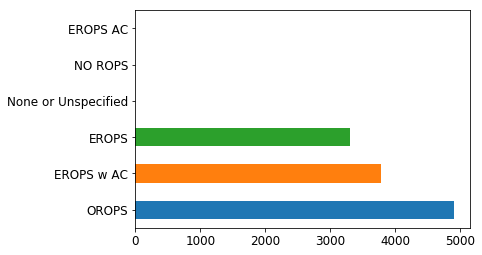

In [14]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0) #create a column for std of prediction
x['pred'] = np.mean(preds, axis=0) # create a column for mean of preds
x.Enclosure.value_counts().plot.barh();

In [15]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.836668,0.278285
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.576592,0.266358
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.682043,0.225603


sales and pred mean are close

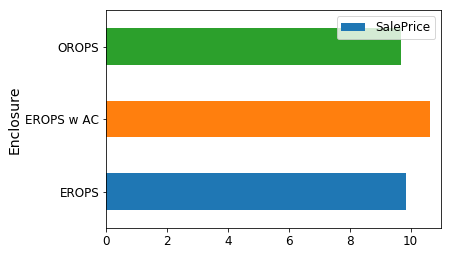

In [16]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

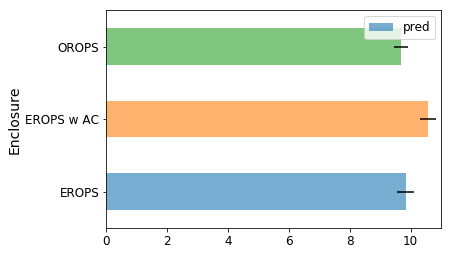

In [17]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

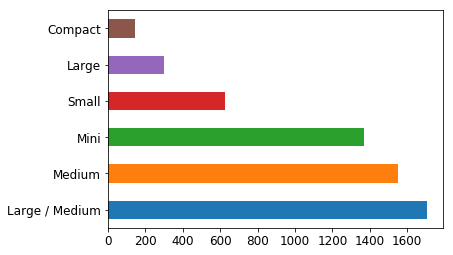

In [18]:
raw_valid.ProductSize.value_counts().plot.barh();

In [19]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.853859,0.342319
Large,10.470589,10.389464,0.363734
Large / Medium,10.691871,10.640564,0.308221
Medium,10.681511,10.625761,0.285241
Mini,9.535147,9.560176,0.247655
Small,10.324448,10.330846,0.303313


In [20]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.035010
Compact           0.034740
Small             0.029360
Large / Medium    0.028967
Medium            0.026844
Mini              0.025905
dtype: float64

# Feature importance
this tells us which columns matter

In [21]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.164375
37,Coupler_System,0.133349
13,ProductSize,0.095066
14,fiProductClassDesc,0.082561
10,fiSecondaryDesc,0.051077
63,saleElapsed,0.050580
2,ModelID,0.049253
38,Grouser_Tracks,0.041363
19,Enclosure,0.038275
8,fiModelDesc,0.031808


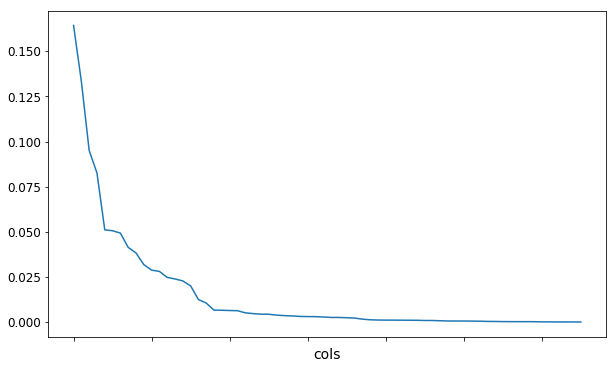

In [22]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

we can plot columns in the orderof importance

In [23]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

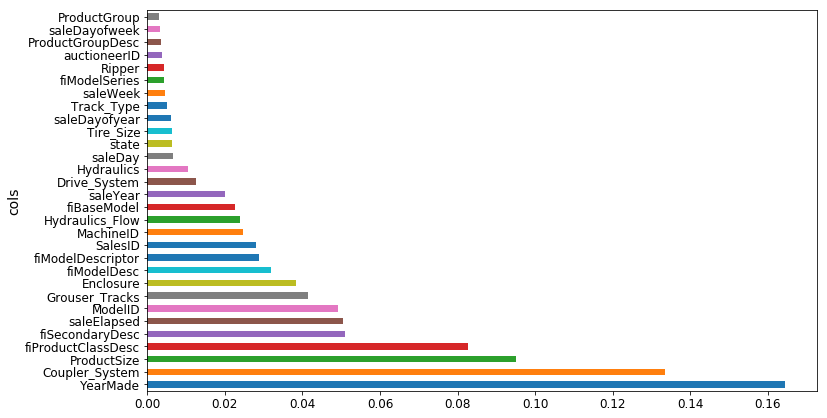

In [24]:
plot_fi(fi[:30])

In [25]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

23

We removed columns with an importance of less than 0.005 

In [26]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [27]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20681086125480602, 0.24573214242888902, 0.9106115282095582, 0.8921619792736802, 0.894325259772132]


The R^2 didn't change as the less important columns didn't have alot of impact. It also addresses colinearity

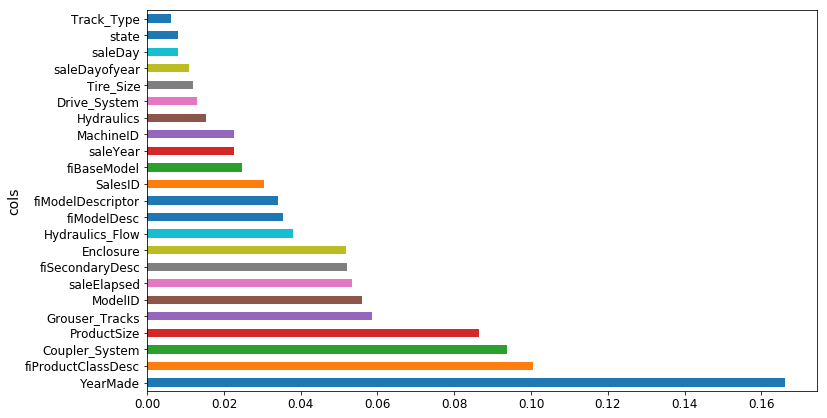

In [28]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi)

a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. 

min_samples_leaf removes a layer from the tree. if we are using 20000 samples we will end up with 20000 leaf nodes. if we set the min_sample_leaf to 1 we will get 10000 leaf nodes.

max_features at each split in a tree we pick a different half of the features. Trees are going to be more varied less accurate creating more trees with less correlation.

## One-hot encoding


proc_df's optional *max_n_cat* argument will turn some categorical variables into new columns.

For example, the column **ProductSize** which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini

and the column **ProductSize** gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the *max_n_cat* argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.

In [29]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20708696514789496, 0.2531451602737345, 0.9103726918174487, 0.8855575276263854, 0.8926581846086131]


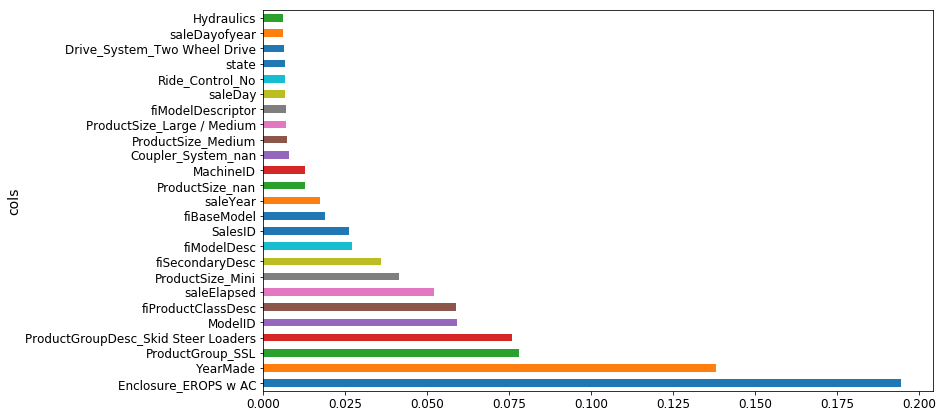

In [30]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25])

# Removing redundant features

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people
it is harder to interpret is that there seem to be some variables with very similar meanings.

In [31]:
from scipy.cluster import hierarchy as hc

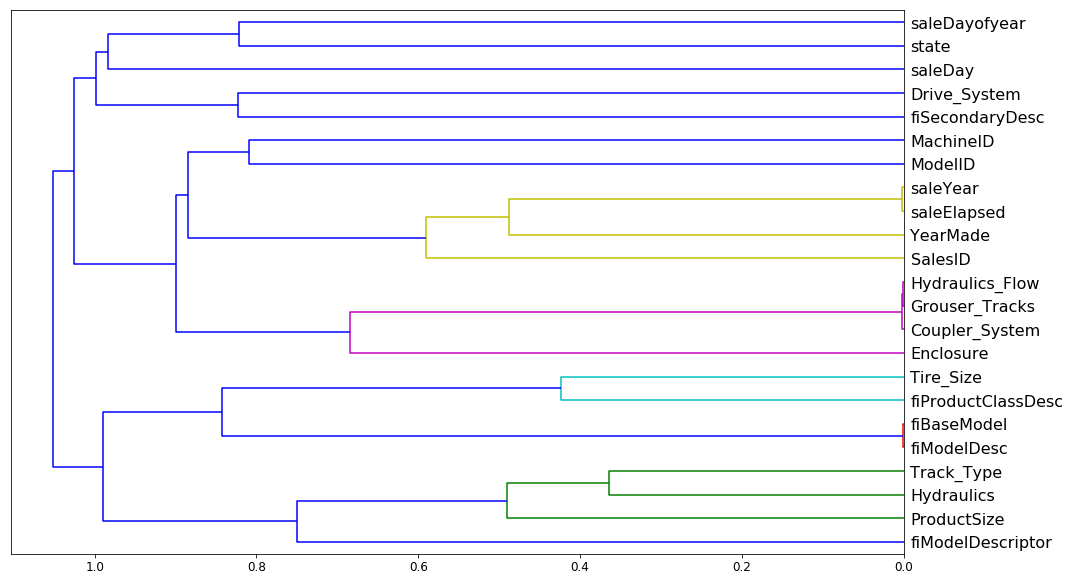

In [32]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

HOrizontal axis show how similar the smaller the closer they are related

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [33]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

our baseline.

In [34]:
get_oob(df_keep)

0.889464826228698

In [35]:
df_keep.head()

,YearMade,Coupler_System,ProductSize,fiProductClassDesc,fiSecondaryDesc,saleElapsed,ModelID,Grouser_Tracks,Enclosure,fiModelDesc,...,Hydraulics_Flow,fiBaseModel,saleYear,Drive_System,Hydraulics,saleDay,state,Tire_Size,saleDayofyear,Track_Type
0,2004,0,0,59,41,1163635200,3157,0,3,950,...,0,296,2006,0,1,16,1,17,320,0
1,1996,0,4,62,55,1080259200,77,0,3,1725,...,0,527,2004,0,1,26,33,12,86,0
2,2001,1,0,39,0,1077753600,7009,1,6,331,...,3,110,2004,0,4,26,32,0,57,0
3,2001,0,6,8,0,1305763200,332,0,3,3674,...,0,1375,2011,0,1,19,44,0,139,0
4,2007,1,0,40,0,1248307200,17311,1,1,4208,...,3,1529,2009,0,4,23,32,0,204,0


df_keep is the dataframe with columns that have more than 0.05 importance

Trying to work without features that are related


In [36]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8894446276200177
saleElapsed 0.8874647567107373
fiModelDesc 0.8894384762048201
fiBaseModel 0.8892235165673438
Grouser_Tracks 0.8900819008471963
Coupler_System 0.8902276271534739


It looks like we can try one from each group for removal.

In [37]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.888590747538288

In [38]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [39]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [40]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [41]:
reset_rf_samples()

using the entire dataset

In [42]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12473654362781, 0.22616978198875956, 0.9674821189718479, 0.9086481950224102, 0.9089095541582469]


# Partial dependence
for the features that are important how do they relate to the dependent varible

In [44]:
from pdpbox import pdp


In [45]:
set_rf_samples(50000)

In [46]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

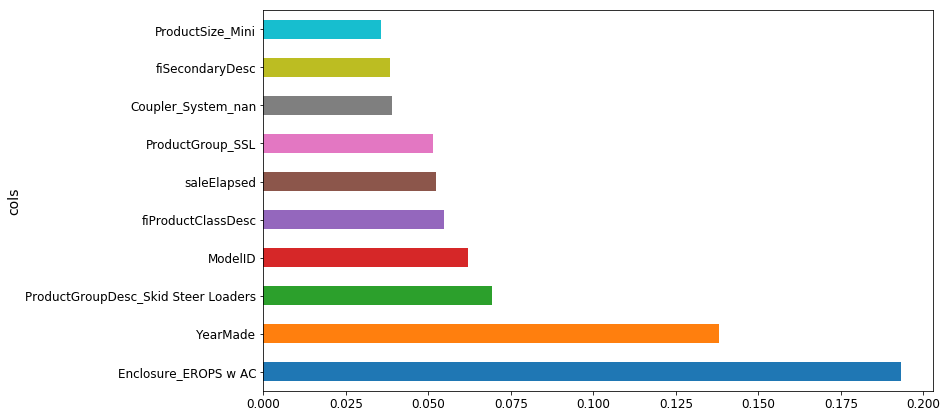

In [47]:
plot_fi(rf_feat_importance(m, df_trn2)[:10])

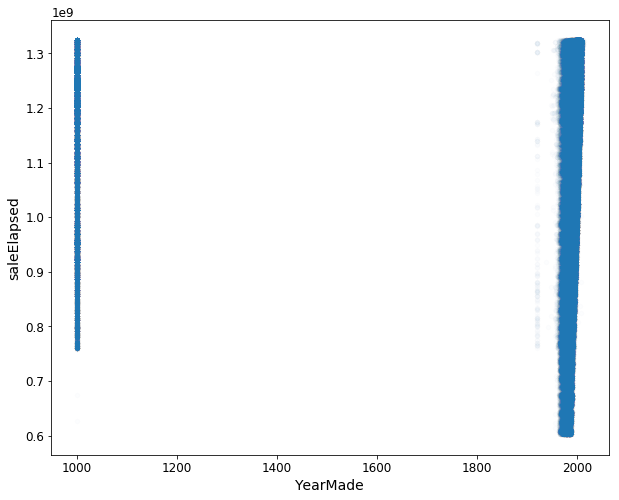

In [48]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [49]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

In [ ]:
#ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [52]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [53]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f085b363b00>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f085a31e1d0>})

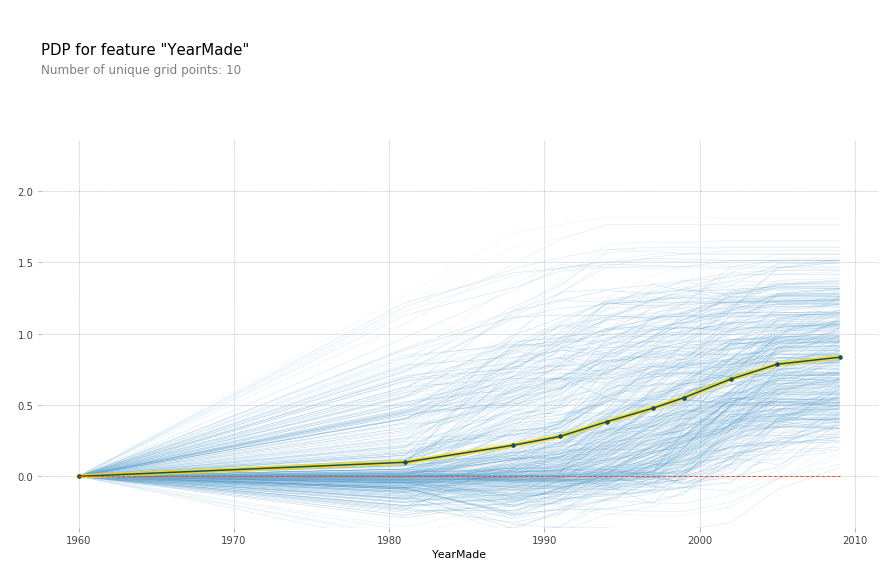

In [54]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0848d45630>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0848dc0710>})

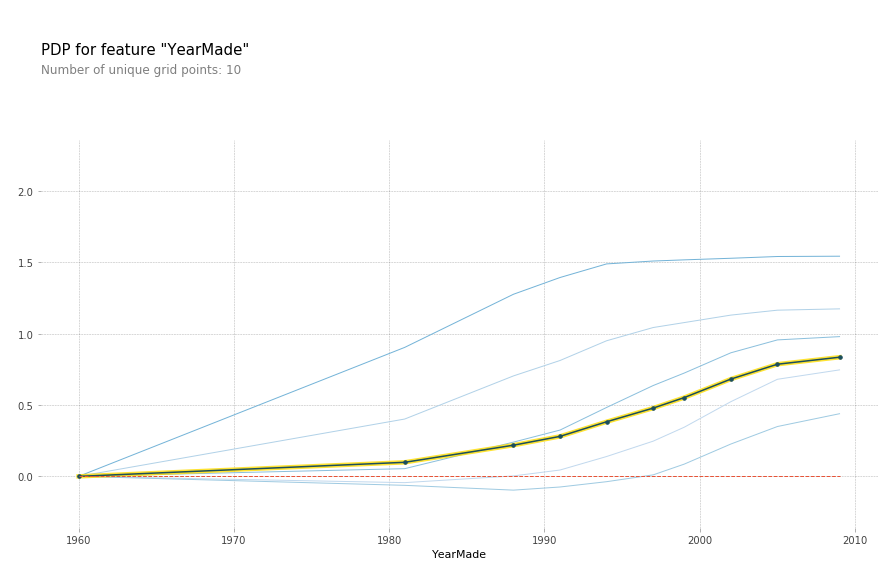

In [55]:
plot_pdp('YearMade', clusters=5)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

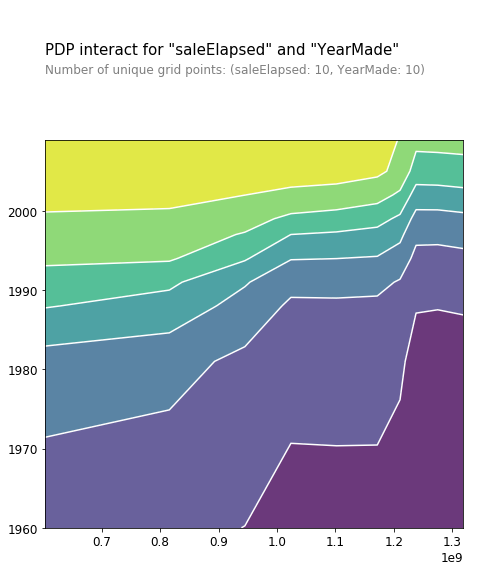

In [57]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0848b24940>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0848aca4a8>})

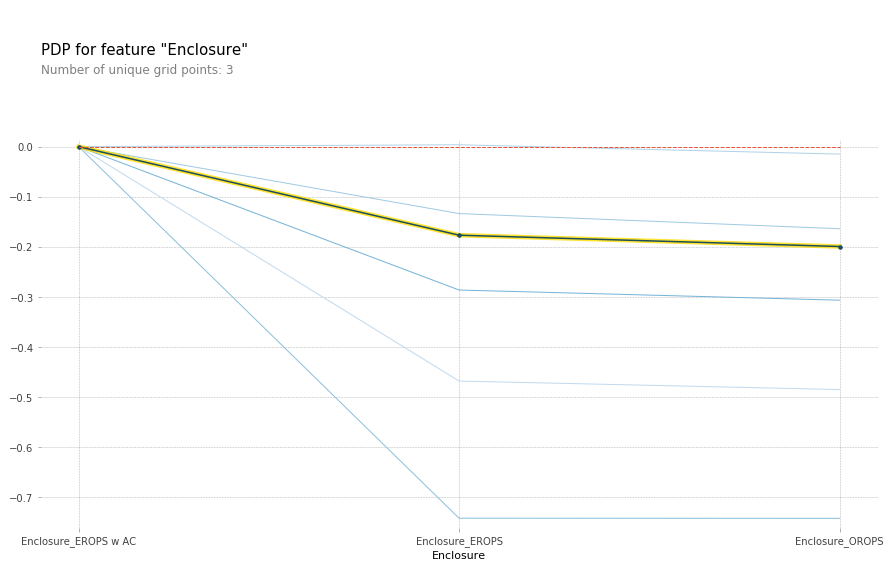

In [58]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [5]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
# interaction between yearmade and saleyear
df_keep['age'] =   df_raw['age'] = df_raw.saleYear-df_raw.YearMade

NameError: name 'df_raw' is not defined

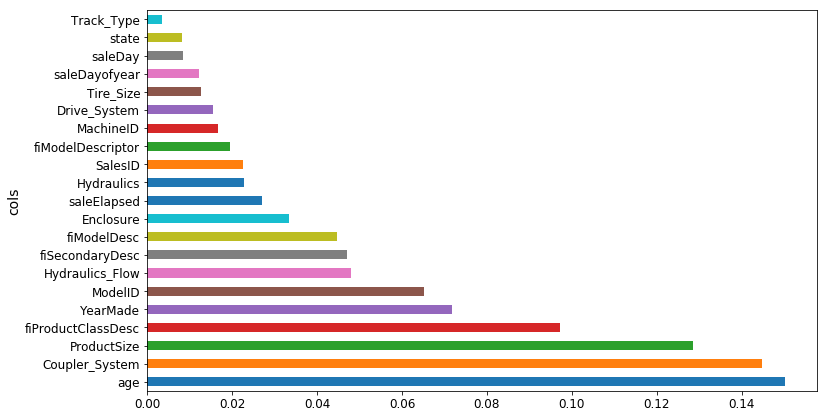

In [69]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

# Tree interpreter

In [ ]:
# !pip install treeinterpreter

In [61]:
from treeinterpreter import treeinterpreter as ti

In [62]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [63]:
row = X_valid.values[None,0]; row

array([[      1999,          0,          5,         17,          0, 1284595200,        665,          1,
              3232,          0,    4364751,    2300944,          0,          0,         12,         16,
                35,          0,        259,          2,         11]])

In [64]:
prediction, bias, contributions = ti.predict(m, row)

In [65]:
prediction[0], bias[0]

(9.449483238540264, 10.106014845159097)

In [66]:
idxs = np.argsort(contributions[0])

In [67]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.5086993305648908),
 ('age', 11, -0.11993473287295657),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.09679251500383948),
 ('fiModelDesc', 'KX1212', -0.09039767502437197),
 ('fiSecondaryDesc', nan, -0.06248423590295724),
 ('Enclosure', 'EROPS', -0.01860326226346589),
 ('saleDayofyear', 259, -0.01564713828303672),
 ('fiModelDescriptor', nan, -0.015237286636373115),
 ('Tire_Size', nan, -0.013832357691694285),
 ('saleElapsed', 1284595200, -0.004682538263499269),
 ('SalesID', 4364751, -0.004539673037940428),
 ('state', 'Ohio', -0.0007182782136516686),
 ('MachineID', 2300944, 0.004710400267057535),
 ('saleDay', 16, 0.00472083561576917),
 ('Drive_System', nan, 0.004788421268223209),
 ('Hydraulics', 'Standard', 0.012098023849935257),
 ('Track_Type', 'Steel', 0.020294189576281107),
 ('Hydraulics_Flow', nan, 0.02619289084548022),
 ('ModelID', 665, 0.05234532510982111),
 ('Coupler_System', nan, 0.06378085501249937),
 ('YearMade',

In [68]:
contributions[0].sum()

-0.6565316066188334

# Extrapolation
Avoi  

In [70]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [71]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999875350576504

In [72]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
10,SalesID,0.736893
5,saleElapsed,0.189410
11,MachineID,0.062412
8,fiModelDesc,0.003530
6,ModelID,0.002753
14,Hydraulics,0.001299
18,saleDayofyear,0.001138
0,YearMade,0.000655
7,Enclosure,0.000450
12,Hydraulics_Flow,0.000315


In [73]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [74]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [75]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [76]:
x.drop(feats, axis=1, inplace=True)

In [77]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9788843876597071

In [78]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
17,age,0.233505
0,YearMade,0.189969
15,saleDayofyear,0.152402
5,ModelID,0.081334
7,fiModelDesc,0.062153
13,state,0.057277
12,saleDay,0.056730
3,fiProductClassDesc,0.034226
4,fiSecondaryDesc,0.024636
6,Enclosure,0.020845


In [79]:
set_rf_samples(50000)

In [80]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [81]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20820129999039866, 0.24823161134911695, 0.9094055276554326, 0.8899570696289837, 0.8929068708384839]


In [82]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20895923521449586, 0.2454588996257799, 0.9087447275054388, 0.8924016677440472, 0.8925260197350898]
saleElapsed
[0.21401017322996677, 0.25440892319627784, 0.9042797854936592, 0.8844120254737413, 0.8871563018971473]
MachineID
[0.20704092915298491, 0.246744688000128, 0.91041253617637, 0.8912714496817111, 0.894640088861157]
age
[0.20893227411249965, 0.2481547285311226, 0.9087682745286966, 0.890025224529588, 0.8921797471158692]
YearMade
[0.20871417971553025, 0.25218998903596695, 0.9089586399799503, 0.8864195305081224, 0.8923317856368084]
saleDayofyear
[0.20819425974229258, 0.2430756021609908, 0.9094116543873862, 0.8944809883878652, 0.8933531362037688]


In [83]:
reset_rf_samples()

In [84]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1373385117175185, 0.21845193468902857, 0.9605797386092971, 0.9147764217804771, 0.9093659948801066]


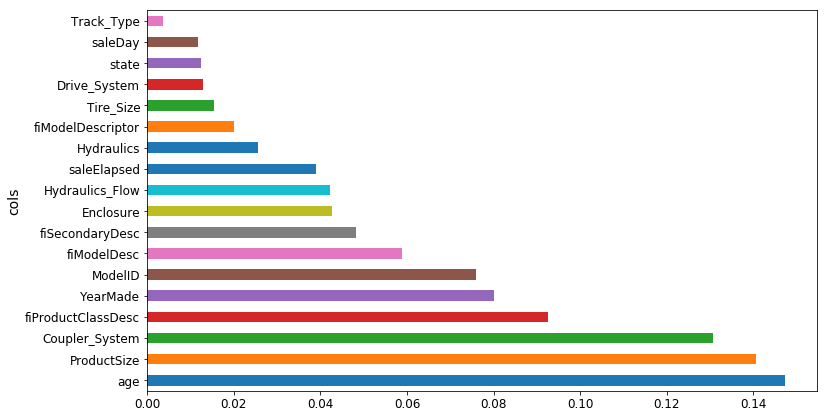

In [85]:
plot_fi(rf_feat_importance(m, X_train));

In [86]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

## Final model!

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)